You can click below to open in Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnGBaker/tdamm_test/blob/knh/notebooks/DemoExample.ipynb)

In [1]:
if 'google.colab' in str(get_ipython()):
    !cd tdamm_test;git pull
    !pip install ./tdamm_test
    !pip install afterglowpy

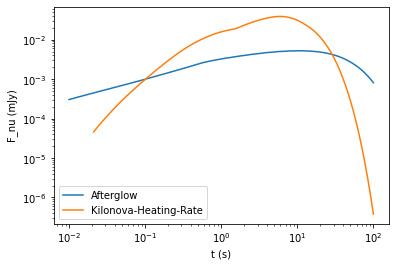

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants
import tdamm



fig, ax = plt.subplots(1, 1)

t = np.geomspace(1.0e-2, 1.0e2, 100) * units.day
nu = 1.0e14 * units.Hz
plotunit=units.mJy

#afterglowpy
model = tdamm.AfterglowModel()
F = model(t, nu, thetaObs=10*units.deg, z=0.5, d_L=1.0e27*units.cm)
F=F*units.mJy #
ax.plot(t, F.to(plotunit), label="Afterglow")


#kilonova-heating-rate        
t = np.geomspace(2.1e-2, 1.0e2, 100) * units.day
mass = 0.05 * units.Msun
velocities = np.asarray([0.1, 0.2, 0.4]) * constants.c
opacities = np.asarray([3.0, 0.5]) * units.cm**2 / units.g
n=4.5
distance=100 * units.Mpc
z=0.0228
model= tdamm.KilonovaHeatingRateModel( mass,velocities,opacities,n,distance,z)
F = model(t, nu)
ax.plot(t, F.to(plotunit), label="Kilonova-Heating-Rate")

ax.set(xscale='log', yscale='log')
ax.set_xlabel('t (s)')
ax.set_ylabel('F_nu ('+plotunit.name+')')
plt.legend()
plt.show()